 # Presentation for  Effects of different features on number of loan listing and loan amount from the loan prosper dataset.
> ## by Abdulmaleek mubaraq



## Dataset Overview

The dataset contains data about 113939 loan listings on 81 columns, between 2005 and 2014. 
 ## Investigation Overview
The goal of my exploration was to answer the following questions:

1. Which set of features has the most highest listings in the dataset
2. Which of these features has the highest average loan amount
3. Which features has the most charge off rate
To achieve this, some of the features of the dataset were explored and the results will be shared below 


In [44]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [45]:
# load in the dataset into a pandas dataframe
loan_df = pd.read_csv('prosperLoanData.csv')
loan_copy= loan_df.copy()
#changing income range and loanstatus columns to categorical types 
ordinal_variables = {'LoanStatus': ['Current',  'Past Due (1-15 days)', 'Past Due (16-30 days)', 
        'Past Due (61-90 days)', 'Past Due (31-60 days)','Past Due (91-120 days)', 
        'Past Due (>120 days)','FinalPaymentInProgress','Defaulted','Cancelled','Chargedoff','Completed'],
                    'IncomeRange': ['Not employed','Not displayed','$0','$1-24,999','$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+' ]}

for x in ordinal_variables:
    column_order = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_variables[x])
    loan_copy[x] = loan_copy[x].astype(column_order)

## Insight 1 
### Distribution of high amount loans: over 25000 

high amount loans(25k+) are found in listings where credit score,income range and employment status duration are high

## chart 1: 
### Average employment status duration increases with income range 

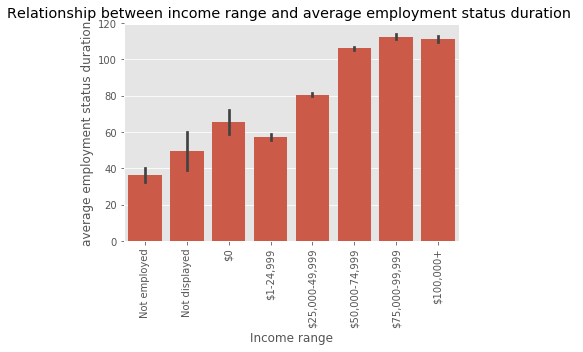

In [46]:
plt.style.use('ggplot');
sb.barplot(data=loan_copy,x='IncomeRange',y='EmploymentStatusDuration',color=sb.color_palette()[0]);
plt.xticks(rotation=90);
plt.xlabel('Income range');
plt.ylabel('average employment status duration');
plt.title('Relationship between income range and average employment status duration ');

## chart2: 
### Lisings with higher employment status duration(600+)  appeared as income range(25K+) and credit score(650+) increases

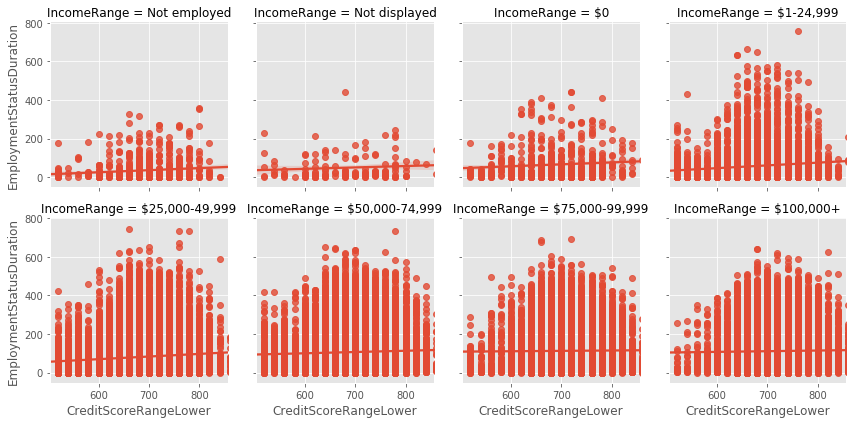

In [47]:
w=sb.FacetGrid(data=loan_copy,col='IncomeRange',col_wrap=4,sharey=True);
w.map(sb.regplot,'CreditScoreRangeLower','EmploymentStatusDuration');

## chart3: 
### Number of high amount loans(25k+) increases at points where income range and credit score are high   (top right corner of the bottom left grid)

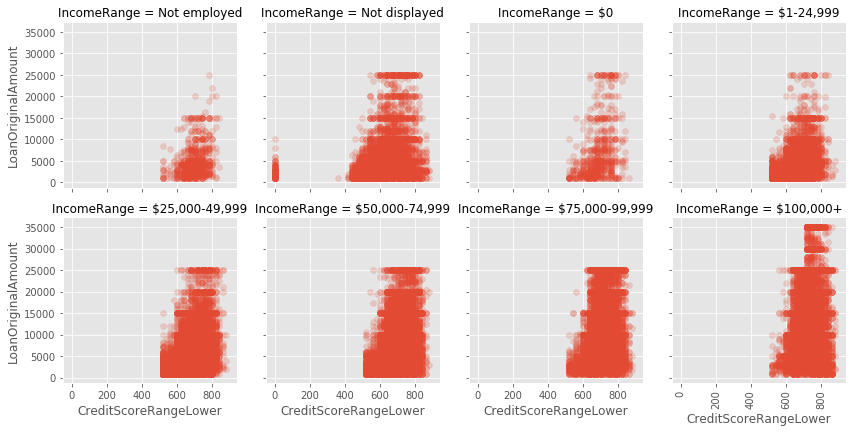

In [48]:
g=sb.FacetGrid(data=loan_copy,col='IncomeRange',col_wrap=4,sharey=True);
g.map(plt.scatter,'CreditScoreRangeLower','LoanOriginalAmount',alpha=.2);
plt.xticks(rotation=90);


## Insight 2 
### Variables that affect number of loan listings
1. Loan lstings in the dataset generally reduces with loan amount.<br><br> 
2. Some of the Variables that increase with increased loan amount (e.g lower credit score) automatically have a negative corrrelation with number of listing.<br> Some level of categorical variables appear to be preferred over their opposite (e.g having a verifiable income and not being in a group)<br><br> 
3. And lastly some variable just shows a decrease in number of listings as their value increases, some of them are('OpenRevolvingMonthlyPayment','EmploymentStatusDuration','OpenCreditLines','OpenRevolvingAccounts') saved in a list named 'antiListingVariables'.



## chart 1: 
### Distribution of the anti listing variables shows that loan listings decrease as they increase

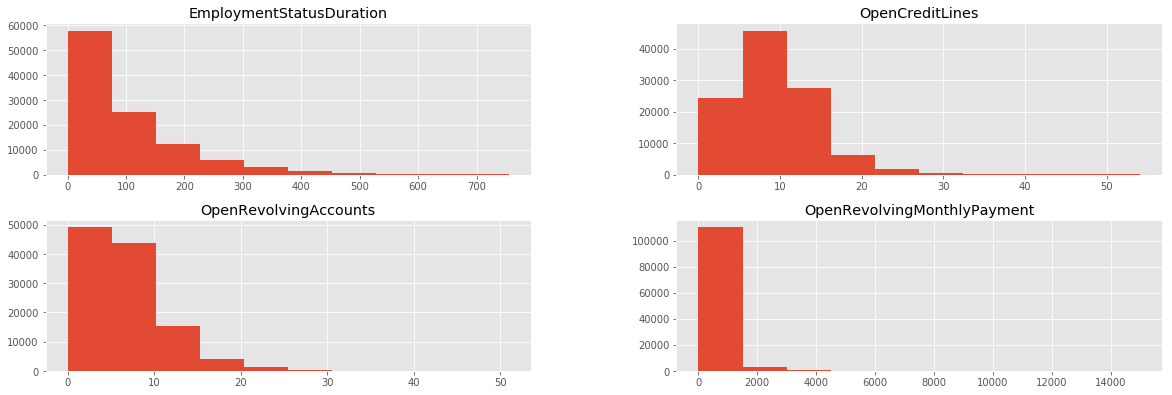

In [49]:
antiListingVariables=['OpenRevolvingMonthlyPayment','EmploymentStatusDuration','OpenCreditLines','OpenRevolvingAccounts']
loan_df.hist(layout=(3,2),figsize=(20,10),column=antiListingVariables);

## chart 2: 
### Number of listings decreases as laon amount and credit score, number of credit lines and revolving accounts increase

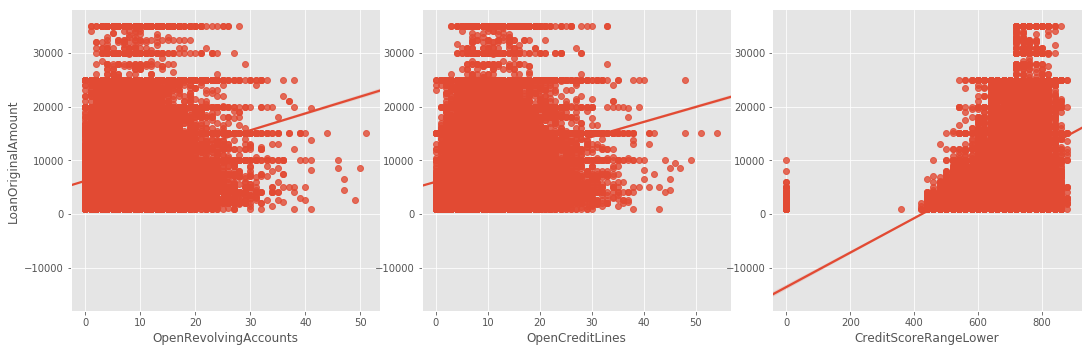

In [50]:
o=sb.PairGrid(data=loan_copy,x_vars=['OpenRevolvingAccounts','OpenCreditLines','CreditScoreRangeLower'],y_vars='LoanOriginalAmount',size=5);
o.map(sb.regplot);

## chart 3: 
### number of listings decrease with increase in any each pair grid of the variables, also the chart shows that most listings have a verified income

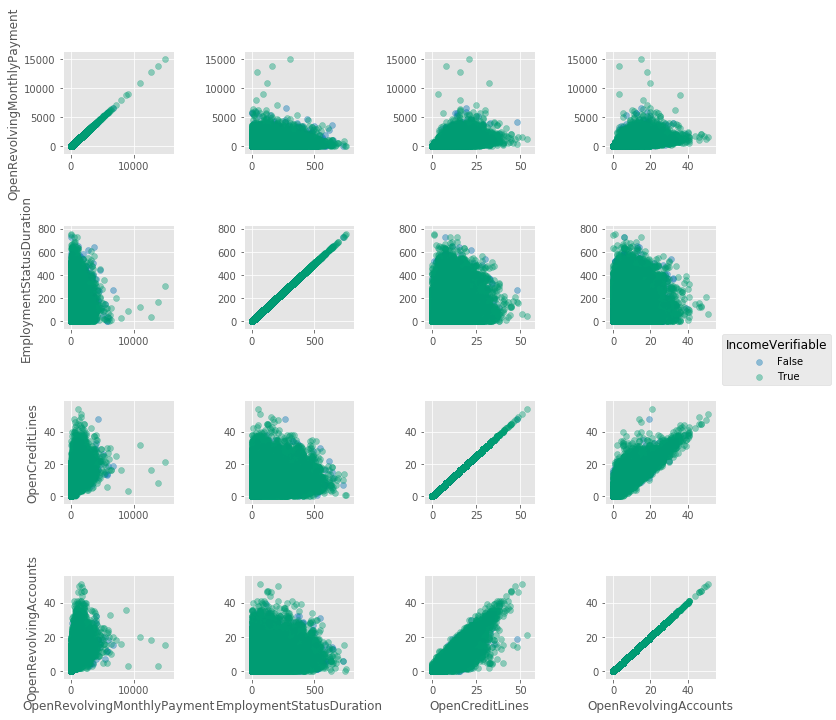

In [51]:
g=sb.PairGrid(data=loan_copy,hue='IncomeVerifiable',palette='colorblind',vars=antiListingVariables);
g.map(plt.scatter,alpha=.4);
g.add_legend();

## Insight 3 
### Features that lead to higher charge off rate

## chart 1: 
### Income range 25,000-49,999  has the highest charge off rate

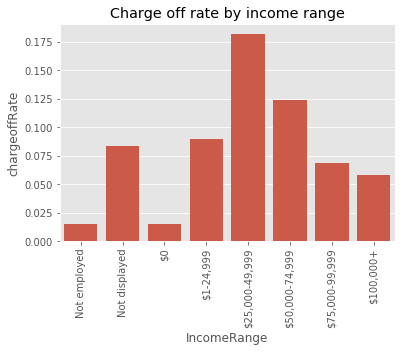

In [52]:
#renaming listing category column for better handling
loan_copy.rename(columns={'ListingCategory (numeric)':'ListingCategory'},inplace=True)
# Filtering out a mini dataset containing only needed variables  
columns=['LoanStatus','IncomeRange', 'ListingCategory' ]
filtered_df=loan_copy.loc[loan_copy.LoanStatus.isin(['Completed','Chargedoff']),columns]

#reshaping the filtered dataset for visualizing income range column
# getting charged off and completed counts on seperate columns
filtered_dfx=pd.melt(filtered_df,'IncomeRange','LoanStatus').groupby(['IncomeRange','value']).count().reset_index().pivot(index='IncomeRange',columns='value',values='variable')# .plot(kind='bar')

# adding chargedoff rate column
filtered_dfx['chargeoffRate']=filtered_dfx.iloc[:, filtered_dfx.columns.get_level_values('value')=='Chargedoff'].values/sum(filtered_dfx.iloc[:, filtered_dfx.columns.get_level_values('value')=='Chargedoff'].values,filtered_dfx.iloc[:, filtered_dfx.columns.get_level_values('value')=='Completed'].values)
filtered_dfx.reset_index(inplace=True)

# plotting categories by chargedoff rate 
sb.barplot(data=filtered_dfx,x=filtered_dfx.IncomeRange,y=filtered_dfx.chargeoffRate,color=sb.color_palette()[0]);
plt.xticks(rotation=90)
plt.title('Charge off rate by income range');


## Chart 2: 
### Listing categories 'green loan', 'household expenses' and 'medical/dental' had the highest chargeoff rate

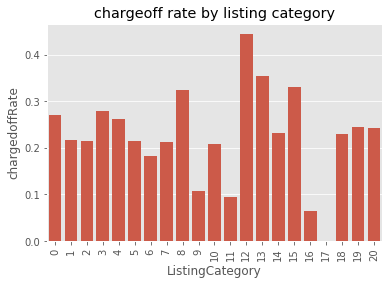

In [53]:
#reshaping the filtered dataset to visualize listing category column
# getting charged off and completed counts on seperate columns

filtered_dfy=pd.melt(filtered_df,'ListingCategory','LoanStatus').groupby(['ListingCategory','value']).count().reset_index().pivot(index='ListingCategory',columns='value',values='variable')

# adding chargedoff rate column
filtered_dfy.reset_index(inplace=True)

filtered_dfy['chargedoffRate']=filtered_dfy.Chargedoff/(filtered_dfy.Chargedoff+filtered_dfy.Completed)

# plotting categories by chargedoff rate 
sb.barplot(data=filtered_dfy,x=filtered_dfy.ListingCategory,y=filtered_dfy.chargedoffRate,color=sb.color_palette()[0]);
plt.xticks(rotation=90)
plt.title('chargeoff rate by listing category');

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt 

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 869512 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_template.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/

In [36]:
# Use this command if you are running this file in local
!jupyter nbconvert <Part_II_Filename>.ipynb --to slides --post serve --no-input --no-prompt

/bin/sh: 1: cannot open Part_II_Filename: No such file


> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
